In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Model Evaluation metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
from datetime import datetime
now = datetime.now() # current date and time
d = now.strftime("%d%m%Y_%H%M")
print(d)

13082022_1842


## Load Dataset

In [3]:

allgame=pd.read_csv( "dataset/2_datasetbilly_clean_content_aftermissingvaluestrlen_snowvsporter_7200data_04082022_1054.csv",encoding='utf-8')

allgame = allgame[['clean_content','score','polarity','appName','sentiment']]


In [4]:
allgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_content  6334 non-null   object
 1   score          6334 non-null   int64 
 2   polarity       6334 non-null   object
 3   appName        6334 non-null   object
 4   sentiment      6334 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.5+ KB


In [5]:
# jika ada data yang tidak memiliki nilai
 allgame.isnull().sum()  


clean_content    0
score            0
polarity         0
appName          0
sentiment        0
dtype: int64

In [6]:
# jika ada data yang tidak miliki nilai di drop
allgame.dropna(inplace=True)

In [7]:
allgame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_content  6334 non-null   object
 1   score          6334 non-null   int64 
 2   polarity       6334 non-null   object
 3   appName        6334 non-null   object
 4   sentiment      6334 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.5+ KB


In [8]:
allgame['string_len'] = allgame['clean_content'].astype(str).apply(len)
allgame['word_count'] = allgame['clean_content'].apply(lambda x: len(str(x).split()))

In [9]:
allgame

,clean_content,score,polarity,appName,sentiment,string_len,word_count
0,certain bug draft pick phase screen load perce...,1,negative,mlbb,0,137,21
1,rate higher problem hold abil alway press prob...,1,negative,mlbb,0,217,37
2,recent even start game alway hero select scree...,1,negative,mlbb,0,150,25
3,game fun interest lot recent game mani time st...,1,negative,mlbb,0,132,22
4,matchmak use phone ram super fast connect comp...,1,negative,mlbb,0,170,30
...,...,...,...,...,...,...,...
6329,amaz,5,positive,hdi,2,4,1
6330,nice,5,positive,hdi,2,4,1
6331,top,5,positive,hdi,2,3,1
6332,main game duit,5,positive,hdi,2,14,3


### Remove Score "3"

In [10]:
#menghilangkan nilai neutral
allgame=allgame[allgame.sentiment != 1]

### All Game Data Describe

In [11]:
allgame.describe()

,score,sentiment,string_len,word_count
count,6334.000000,6334.000000,6334.000000,6334.000000
mean,2.950426,0.970319,67.418535,12.353489
std,1.591984,0.999638,65.967758,11.687477
min,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,9.000000,2.000000
50%,2.000000,0.000000,43.000000,8.000000
75%,4.000000,2.000000,112.000000,20.000000
max,5.000000,2.000000,347.000000,102.000000


## All Game Data Statistics

### AppName Stats

In [12]:
allgame['appName'].value_counts()

mlbb    2284
ffm     2171
hdi     1879
Name: appName, dtype: int64

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='appName', ylabel='count'>

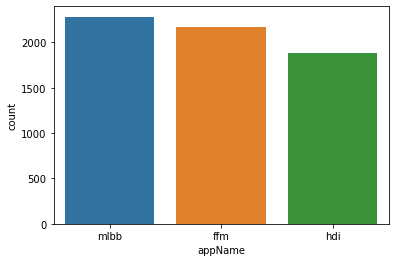

In [13]:
sns.countplot(allgame.appName)

### Score Stats

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

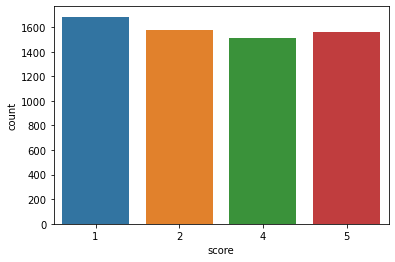

In [14]:
sns.countplot(allgame.score)

In [15]:
allgame['score'].value_counts()

1    1685
2    1576
5    1559
4    1514
Name: score, dtype: int64

### Sentiment Stats

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

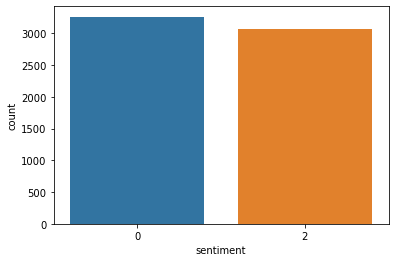

In [16]:
sns.countplot(allgame.sentiment)

In [17]:
allgame['sentiment'].value_counts()

0    3261
2    3073
Name: sentiment, dtype: int64

### Polarity Stats

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='polarity', ylabel='count'>

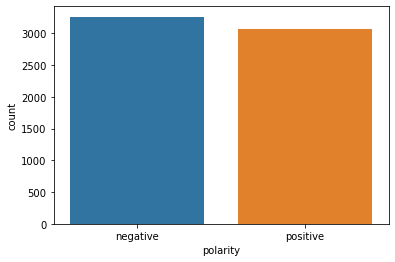

In [18]:
sns.countplot(allgame.polarity)

In [19]:
allgame.shape

(6334, 7)

## Sampling For Test And Training

In [21]:
# sampling data rata
nsamples=3600
all= allgame.sample(n=nsamples,replace=True,random_state=1)
all

,clean_content,score,polarity,appName,sentiment,string_len,word_count
5157,good,2,negative,hdi,0,4,1
235,full storag yet signal automat know pleas fix ...,1,negative,mlbb,0,59,10
3980,love much time free fire game experi good way ...,5,positive,ffm,2,253,45
5192,dong masa top level min,2,negative,hdi,0,23,5
905,edit good,2,negative,mlbb,0,9,2
...,...,...,...,...,...,...,...
4623,realli bad health trust lost thousand game wou...,1,negative,hdi,0,90,15
5586,good,4,positive,hdi,2,4,1
4393,awesom,5,positive,ffm,2,6,1
5311,dong masa top level min,2,negative,hdi,0,23,5


## Grouping Dataset

In [22]:
g = all.groupby(['sentiment','score','appName'])

g.describe()


string_len                                           \
                             count        mean        std  min   25%    50%   
sentiment score appName                                                       
0         1     ffm          319.0   90.394984  70.385914  1.0  20.0   90.0   
                hdi          290.0   47.913793  46.921227  2.0  10.0   37.5   
                mlbb         340.0  105.500000  75.994081  1.0  24.0  108.5   
          2     ffm          310.0   77.735484  59.681688  1.0  18.0   73.0   
                hdi          265.0   22.049057  25.656705  1.0   8.0   15.0   
                mlbb         314.0  102.487261  68.814945  2.0  40.0  100.0   
2         4     ffm          306.0   83.261438  62.587358  1.0  17.0   85.0   
                hdi          216.0   12.537037  21.365447  1.0   4.0    7.5   
                mlbb         350.0   78.705714  63.976327  1.0  16.0   70.5   
          5     ffm          305.0   82.724590  71.183299  1.0  11.0   77.0   
                hdi          269.0   22.427509  30.123987  2.0   8.0   13.0   
                mlbb         316.0   64.367089  65.169119  3.0   9.0   45.0   

                                       word_count                             \
                            75%    max      count       mean        std  min   
sentiment score appName                                                        
0         1     ffm      144.00  261.0      319.0  16.551724  12.616613  1.0   
                hdi       73.00  255.0      290.0   9.165517   8.871644  1.0   
                mlbb     170.00  258.0      340.0  18.655882  12.971348  1.0   
          2     ffm      120.75  240.0      310.0  14.400000  10.999323  1.0   
                hdi       26.00  192.0      265.0   4.547170   4.909661  1.0   
                mlbb     155.50  244.0      314.0  18.277070  11.957178  1.0   
2         4     ffm      131.00  249.0      306.0  15.081699  11.096441  1.0   
                hdi       10.00  152.0      216.0   2.699074   4.069992  1.0   
                mlbb     128.75  250.0      350.0  14.094286  11.113621  1.0   
          5     ffm      134.00  253.0      305.0  15.249180  13.096185  1.0   
                hdi       26.00  254.0      269.0   4.382900   5.460018  1.0   
                mlbb     103.00  264.0      316.0  11.731013  11.509849  1.0   

                                                 
                         25%   50%    75%   max  
sentiment score appName                          
0         1     ffm      4.0  17.0  26.00  48.0  
                hdi      2.0   7.0  14.00  50.0  
                mlbb     6.0  19.0  29.25  44.0  
          2     ffm      4.0  13.0  21.00  49.0  
                hdi      2.0   3.0   6.00  35.0  
                mlbb     8.0  18.0  28.00  45.0  
2         4     ffm      4.0  15.0  23.00  41.0  
                hdi      1.0   2.0   2.00  29.0  
                mlbb     3.0  13.0  22.00  44.0  
          5     ffm      2.0  14.0  25.00  73.0  
                hdi      2.0   3.0   5.00  45.0  
                mlbb     2.0   8.0  19.00  44.0

In [24]:
g.size()

sentiment  score  appName
0          1      ffm        319
                  hdi        290
                  mlbb       340
           2      ffm        310
                  hdi        265
                  mlbb       314
2          4      ffm        306
                  hdi        216
                  mlbb       350
           5      ffm        305
                  hdi        269
                  mlbb       316
dtype: int64

### Group Sampling to get balanced dataset

In [25]:
ngsamples=250
gg=g.sample(ngsamples,replace=True,random_state=1)
groupsample = gg[['clean_content','score','polarity','appName','sentiment']]
groupsample

,clean_content,score,polarity,appName,sentiment
2562,game becom bore updat slow interest game feel ...,1,negative,ffm,0
2613,give reason wish improv game,1,negative,ffm,0
2783,pleas come back,1,negative,ffm,0
2731,old player player free fire l noth player give...,1,negative,ffm,0
2422,free fire fire mani game new mode come includ ...,1,negative,ffm,0
...,...,...,...,...,...
2200,kapa,5,positive,mlbb,2
1889,hard caus alway die like dead bit amaz game ev...,5,positive,mlbb,2
1982,fun lot interact world high play,5,positive,mlbb,2
2029,game incred reason like leagu mani incred saber,5,positive,mlbb,2


In [26]:
duplicate = groupsample[groupsample.duplicated()]
duplicate

,clean_content,score,polarity,appName,sentiment
2835,game bore new updat,1,negative,ffm,0
2554,network consumpt bad previous version unless n...,1,negative,ffm,0
2737,veri best,1,negative,ffm,0
2315,hate game pay win game mean pay game chanc win...,1,negative,ffm,0
2729,old game best,1,negative,ffm,0
...,...,...,...,...,...
2091,cool game,5,positive,mlbb,2
2200,kapa,5,positive,mlbb,2
1889,hard caus alway die like dead bit amaz game ev...,5,positive,mlbb,2
1982,fun lot interact world high play,5,positive,mlbb,2


In [28]:
groupsample.describe()


,score,sentiment
count,3000.000000,3000.000000
mean,3.000000,1.000000
std,1.581402,1.000167
min,1.000000,0.000000
25%,1.750000,0.000000
50%,3.000000,1.000000
75%,4.250000,2.000000
max,5.000000,2.000000


### Make Directory if does not exists

In [31]:
import os

datasets="7200_allgame_"
direktori="7200_groupsample"+str(ngsamples)+"_from"+str(nsamples)+"samples_replacetrue_randomstate42cv10"
# direktori="7200_nogrouping_"+str(nsamples)+"samples_gs_ngram_replacetrue_randomstate42cv10"
# direktori="5400data_"+str(nsamples)+"sample_no_option"
if not os.path.exists("hasil/"+direktori):
    os.makedirs("hasil/"+direktori)

### Save Group and Grouping Samples

In [32]:
#g.to_csv( "hasil/"+direktori+"/4_1_grouping_allsample_by_"+str(nsamples)+"_"+d+".csv", index=False,header=True, encoding='utf-8-sig')
groupsample.to_csv( "hasil/"+direktori+"/4_1_grouping_sampling"+str(ngsamples)+"_from"+str(nsamples)+"_"+d+".csv", index=False,header=True, encoding='utf-8-sig')

### Group Samples Statistics

In [33]:
score=pd.DataFrame(groupsample['score'].value_counts())
score.to_csv( "hasil/"+direktori+"/4_groupsample_score_"+datasets+"data_"+d+".csv", index=True,header=True, encoding='utf-8-sig')
# score=pd.DataFrame(all['score'].value_counts())
# score.to_csv( "hasil/"+direktori+"/4_all_score_"+datasets+"data_"+d+".csv", index=True,header=True, encoding='utf-8-sig')
score

,score
1,750
2,750
4,750
5,750


In [34]:
sentiment=pd.DataFrame(groupsample['sentiment'].value_counts())
sentiment.to_csv( "hasil/"+direktori+"/4_groupsample_sentiment_"+datasets+"data_"+d+".csv", index=True,header=True, encoding='utf-8-sig')
# sentiment=pd.DataFrame(all['sentiment'].value_counts())
# sentiment.to_csv( "hasil/"+direktori+"/4_all_sentiment_"+datasets+"data_"+d+".csv", index=True,header=True, encoding='utf-8-sig')
sentiment

,sentiment
0,1500
2,1500


In [35]:
appname=pd.DataFrame(groupsample['appName'].value_counts())
appname.to_csv( "hasil/"+direktori+"/4_groupsample_appname_"+datasets+"data_"+d+".csv", index=True,header=True, encoding='utf-8-sig')
# appname=pd.DataFrame(all['appName'].value_counts())
# appname.to_csv( "hasil/"+direktori+"/4_all_appname_"+datasets+"data_"+d+".csv", index=True,header=True, encoding='utf-8-sig')
appname

,appName
ffm,1000
hdi,1000
mlbb,1000


In [36]:
d = datetime.now().strftime("%d%m%Y_%H%M")
print(d)

13082022_1920


# DATA TRAINING & TESTING SEPARATION

In [37]:
dataset=groupsample #all
folder=direktori
dtlatih=75
dtuji=100-dtlatih
X = dataset['clean_content']     # Define feature matriX
y = dataset['sentiment']         # Define target feature matriX
jmluji=float(dtuji/100)
print(jmluji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jmluji, random_state=42, stratify=y)

datalatih=('Dataset {} {}:{} \n [INFO] Sebaran kelas pada training  set: \n negative: \t {} \n neutral: \t{} \n positive:\t{} \n'.format(dataset,int((1-jmluji)*100),int(jmluji*100),sum(y_train==0), sum(y_train==1), sum(y_train==2)))
datauji=('[INFO] Sebaran kelas pada testing set:\n negative: \t{}\n neutral: \t{}\n positive:\t{} \n'.format(sum(y_test==0), sum(y_test==1), sum(y_test==2)))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/'+folder+'/4_1_LatihdanUji_gridsearch_'+str(dtlatih)+'-'+str(dtuji)+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

# print(datalatih, datauji, dimensi_data)

0.25


In [39]:
X_train

1157    sometim annoy play solo win game troll person ...
3236                                      free fire lover
5119                                       saya chip saya
6085                  game fun mani dont wait play togeth
3569    well nice game well rog face like sometim drop...
                              ...                        
4039    happi got 3 may game progress futur absolut be...
5464    game great spend free time like taunt anim met...
514                                        fair truth bad
4660    chang star game danger money brain game make a...
4633    signal good game lag chang schema slot scatter...
Name: clean_content, Length: 2250, dtype: object

In [40]:
X_test

5628               yang saya agar saya saya id di saya di
5209                                                  min
466     cant play game like use sinc updat there alway...
2258                                                 nice
5286    good game balanc win lose last ratio win lose ...
                              ...                        
6177    nice long time play sinc view month ago win tu...
652     hey realli play game problem starter event roa...
512                              wag na instal tong na na
5354      system chat live fast top mau chat live dan via
4349                                         fantast game
Name: clean_content, Length: 750, dtype: object

## SAVE DATASET

In [41]:
X_train.to_csv( "hasil/"+folder+"/4_1_train_data_"+str(dtlatih)+"_"+d+".csv", index=True, header=True,encoding='utf-8-sig')
X_test.to_csv( "hasil/"+folder+"/4_1_test_data_"+str(dtuji)+"_"+d+".csv", index=True, header=True,encoding='utf-8-sig')

# FEATURE EXTRACTION TFIDF

In [1]:
# ngram_range = (1,2) #bigram
ngram = (1,3) #Uni & Tri
#max_df = 0.50 means "ignore terms that appear in more than 50% of the documents"
# min_df = 5 means "ignore terms that appear in less than 5 documents".
mindf = 1
featmax=3000
fs="unitrigram_max"+str(featmax)
# fs="unigram_nomax"
# tfidf = TfidfVectorizer(ngram_range=ngram, min_df=mindf,max_features=1000)
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(analyzer='word',ngram_range=ngram,min_df=mindf,max_features=featmax)
# tfidf = TfidfVectorizer(analyzer='word',ngram_range=ngram,min_df=mindf)
vectors = tfidf.fit_transform(dataset.clean_content).toarray()
fs


NameError: name 'TfidfVectorizer' is not defined

In [86]:
all.to_csv( "hasil/"+direktori+"/4_1_sampling_all_"+str(nsamples)+"_randsvc42_randsampling1_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

In [87]:
xtrain_vectors=tfidf.fit_transform(X_train).toarray()
xtest_vectors=tfidf.fit_transform(X_test).toarray()


In [88]:
xtrain_vectors


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
xtest_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
X_train_to_df = tfidf.fit_transform(X_train).toarray()
train_words_df = pd.DataFrame(X_train_to_df, columns=tfidf.get_feature_names_out())
train_words_df.to_csv( "hasil/"+folder+"/4_1_tfidf_training_data_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')
train_words_df.head()

,1a,1a 1a,1a 34,1a 34a,1a aa,1i,2a,2a 34,34,34 1a,...,ya,ya ga,yan,yang,yang main,year,year problem,yes,yet,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
train_words_df.describe()

,1a,1a 1a,1a 34,1a 34a,1a aa,1i,2a,2a 34,34,34 1a,...,ya,ya ga,yan,yang,yang main,year,year problem,yes,yet,zero
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,...,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,0.000562,0.000218,0.000115,0.000140,0.000053,0.001426,0.000596,0.000093,0.000280,0.000191,...,0.003983,0.001647,0.001394,0.006016,0.000952,0.001337,0.000373,0.001105,0.000804,0.000424
std,0.018932,0.007911,0.004079,0.004733,0.002530,0.031583,0.022276,0.004427,0.010281,0.006526,...,0.048825,0.027603,0.028115,0.061390,0.020448,0.018615,0.008891,0.019676,0.018690,0.010671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.694449,0.347225,0.173612,0.173612,0.120006,1.000000,1.000000,0.210010,0.455774,0.256373,...,1.000000,0.469898,0.801263,1.000000,0.486103,0.376973,0.234153,0.778533,0.720344,0.384162


In [92]:
X_test_to_df = tfidf.transform(X_test).toarray()
test_words_df = pd.DataFrame(X_test_to_df, columns=tfidf.get_feature_names_out())
test_words_df.to_csv( "hasil/"+folder+"/4_1_tfidf_testing_data_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')
test_words_df.head()

,1a,1a 1a,1a 34,1a 34a,1a aa,1i,2a,2a 34,34,34 1a,...,ya,ya ga,yan,yang,yang main,year,year problem,yes,yet,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.207945,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Word Visualization

In [93]:
from nltk.corpus import stopwords
from collections import Counter
from collections import defaultdict

In [94]:
# Code Snippet for Top Non-Stopwords Barchart
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x)

In [95]:
def plot_top_ngrams_barchart(text, n=2):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams = _get_top_ngram(text, n)[:10]
    x, y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y, y=x)


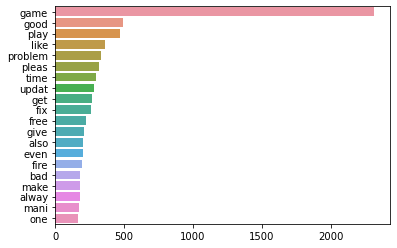

In [96]:
plot_top_non_stopwords_barchart(X_train)

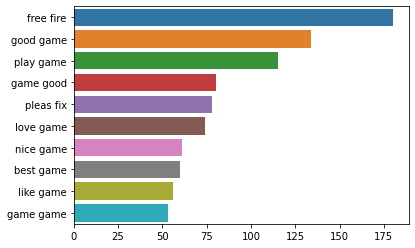

In [97]:
plot_top_ngrams_barchart(X_train, 2)

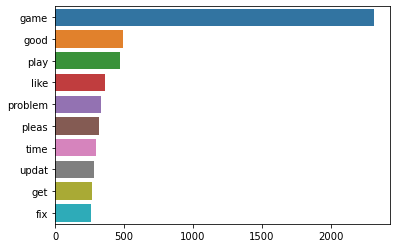

In [98]:
plot_top_ngrams_barchart(X_train, 1)

In [99]:
def plot_wordcloud(text):
    corpus=[]
    
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        # stem=SnowballStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

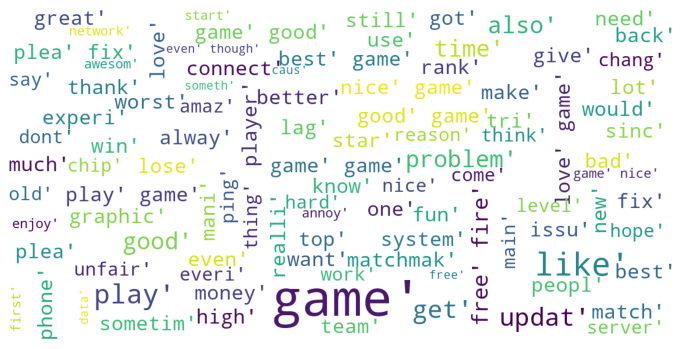

In [100]:
plot_wordcloud(X_train)

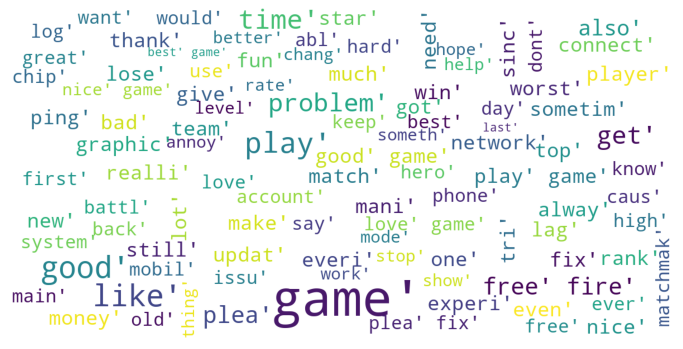

In [101]:
plot_wordcloud(X_test)

## Distribution of Positive Text

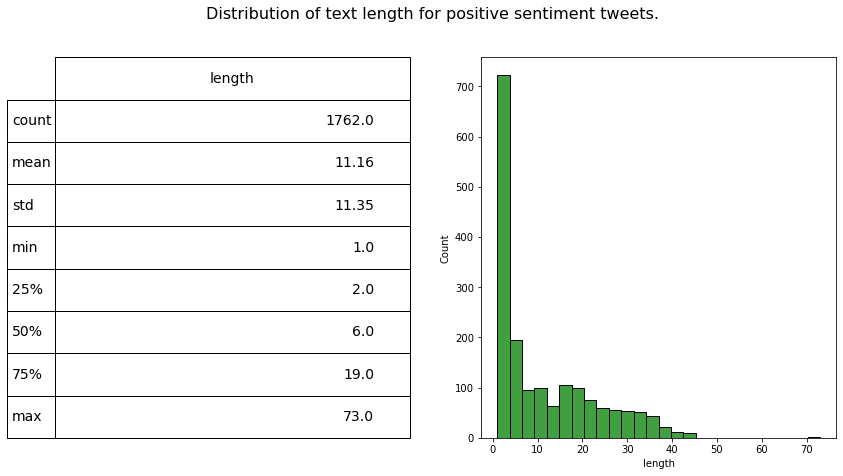

In [102]:
fig = plt.figure(figsize=(14,7))
all['length'] = all.clean_content.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(all[all['polarity']=='positive']['length'], ax=ax1,color='green')
describe = all.length[all.polarity=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

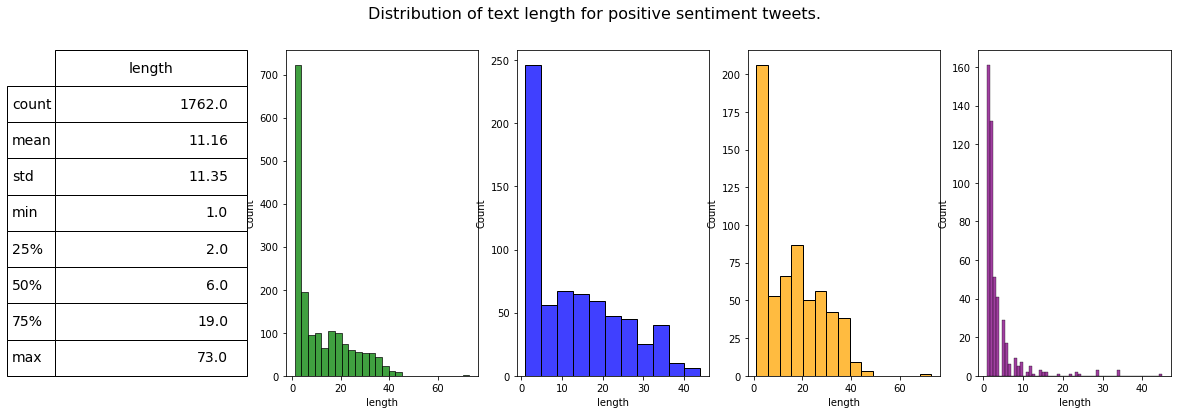

In [103]:
fig = plt.figure(figsize=(20,6))
all['length'] = all.clean_content.str.split().apply(len)
ax1 = fig.add_subplot(152)
sns.histplot(all[all['polarity']=='positive']['length'], ax=ax1,color='green')
describe = all.length[all.polarity=='positive'].describe().to_frame().round(2)

ax3 = fig.add_subplot(153)
# allgame[(allgame['polarity']=='positive') & (allgame['appName']=='mlbb')]
sns.histplot(all[(all['polarity']=='positive') & (all['appName']=='mlbb')]['length'], ax=ax3,color='blue')
# describe = all.length[all.polarity=='positive'].describe().to_frame().round(2)

ax4 = fig.add_subplot(154)
# allgame[(allgame['polarity']=='positive') & (allgame['appName']=='mlbb')]
sns.histplot(all[(all['polarity']=='positive') & (all['appName']=='ffm')]['length'], ax=ax4,color='orange')
# describe = all.length[all.polarity=='positive'].describe().to_frame().round(2)

ax5 = fig.add_subplot(155)
ax5.axis('on')
# allgame[(allgame['polarity']=='positive') & (allgame['appName']=='mlbb')]
sns.histplot(all[(all['polarity']=='positive') & (all['appName']=='hdi')]['length'], ax=ax5,color='purple')
# describe = all.length[all.polarity=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(151)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

## Distribution of Negative Text

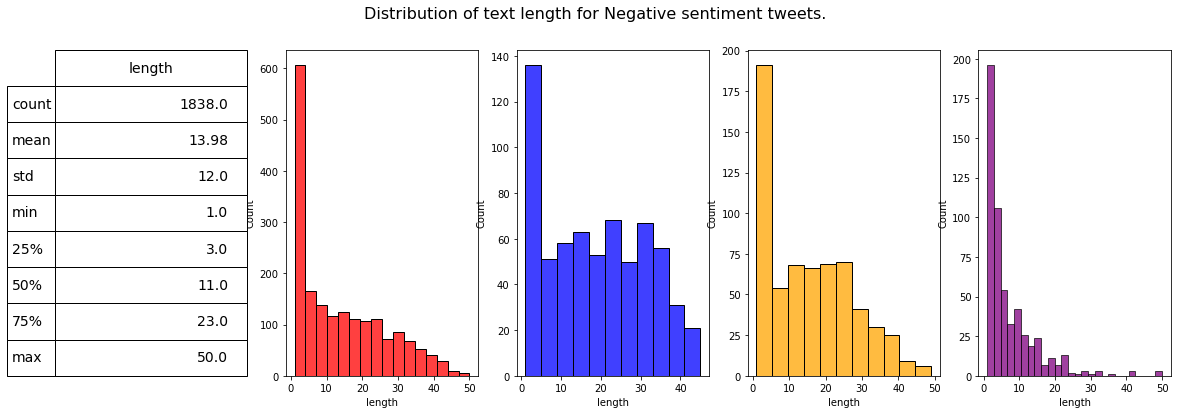

In [104]:
fig = plt.figure(figsize=(20,6))
all['length'] = all.clean_content.str.split().apply(len)
ax1 = fig.add_subplot(152)
sns.histplot(all[all['polarity']=='negative']['length'], ax=ax1,color='red')
describe = all.length[all.polarity=='negative'].describe().to_frame().round(2)

ax3 = fig.add_subplot(153)
# allgame[(allgame['polarity']=='negative') & (allgame['appName']=='mlbb')]
sns.histplot(all[(all['polarity']=='negative') & (all['appName']=='mlbb')]['length'], ax=ax3,color='blue')
# describe = all.length[all.polarity=='negative'].describe().to_frame().round(2)

ax4 = fig.add_subplot(154)
# allgame[(allgame['polarity']=='negative') & (allgame['appName']=='mlbb')]
sns.histplot(all[(all['polarity']=='negative') & (all['appName']=='ffm')]['length'], ax=ax4,color='orange')
# describe = all.length[all.polarity=='negative'].describe().to_frame().round(2)

ax5 = fig.add_subplot(155)
ax5.axis('on')
# allgame[(allgame['polarity']=='negative') & (allgame['appName']=='mlbb')]
sns.histplot(all[(all['polarity']=='negative') & (all['appName']=='hdi')]['length'], ax=ax5,color='purple')
# describe = all.length[all.polarity=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(151)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

# PIPELINE & GRIDSEARCH TEST

In [105]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pprint import pprint
from time import time
from sklearn.decomposition import PCA

In [106]:

pipe = Pipeline([
      ('bag_of_words', tfidf),
        ('estimator', SVC(random_state=42))])
#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly','sigmoid']
param_grid={
    'estimator__C': Cs,
    'estimator__gamma': gammas,
    'estimator__kernel': kernel,
   }
print(pipe)

Pipeline(steps=[('bag_of_words',
                 TfidfVectorizer(max_features=3000, ngram_range=(1, 3))),
                ('estimator', SVC(random_state=42))])


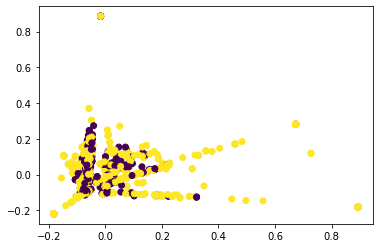

In [107]:
pca_train = PCA(n_components=2).fit(X_train_to_df)
data2D = pca_train.transform(X_train_to_df)
# plt.figure(figsize = (7,7))
plt.scatter(data2D[:,0], data2D[:,1],c=y_train)
plt.savefig("hasil/"+folder+"/4_5_scatter_sebaran_training_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".png", bbox_inches='tight')

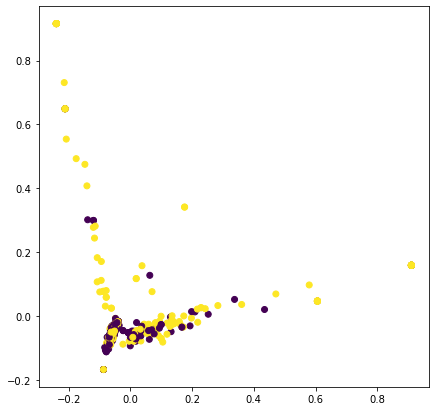

In [108]:
pca_test = PCA(n_components=2).fit(X_test_to_df)
plt.figure(figsize = (7,7))
data2D = pca_test.transform(X_test_to_df)
plt.scatter(data2D[:,0], data2D[:,1], c=y_test)
plt.savefig("hasil/"+folder+"/4_5_scatter_sebaran_testing_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".png", bbox_inches='tight')



In [109]:
# pcx1.savefig("hasil/"+folder+"/4_5_scatter_sebaran_training_"+name+"_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".png", bbox_inches='tight')

In [110]:
%%time
from sklearn.metrics import make_scorer
# scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# scorer=['accuracy','recall_macro','precision_macro','f1_macro']
# scorer = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
# scorer = {"auc": "roc_auc", "accuracy": "accuracy","recall":"recall_macro","precision":"precision_macro","f1":"f1_macro"}
scorer = {"accuracy": "accuracy","recall":"recall_macro","precision":"precision_macro","f1":"f1_macro"}
grid = GridSearchCV(pipe, param_grid=param_grid,cv=10,refit="accuracy",verbose = 3,scoring=scorer,n_jobs=-1) #,return_train_score=True)
print(grid)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('bag_of_words',
                                        TfidfVectorizer(max_features=3000,
                                                        ngram_range=(1, 3))),
                                       ('estimator', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'estimator__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'estimator__kernel': ['linear', 'rbf', 'poly',
                                               'sigmoid']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=3)
CPU times: total: 15.6 ms
Wall time: 17 ms


## GS Fits

In [111]:
%%time
grid.fit(X_train, y_train)
# grid.fit(x_train_minmax, y_train)
y_pred = grid.predict(X_test)
# y_pred = grid.predict(x_test_minmax)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
CPU times: total: 6.73 s
Wall time: 7min 46s


## Performing GS

In [112]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [113]:

# print(classification_report(, y_test )) #print classification report
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe.steps])
print("param_grid:")
pprint(param_grid)
t0 = time()

print("done in %0.3fs" % (time() - t0))
timelapse=("Time : done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid.best_score_)
bestscore=("Best score: %0.3f" % grid.best_score_)
print("Best parameters set:")
best_parameters = grid.best_estimator_.get_params()
print(best_parameters)
bestparam=[]
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (str(param_name), str(best_parameters[param_name])))
    bestparam=bestparam+[{'Parameter':str(param_name),'value':str(best_parameters[param_name]),'training':str(dtlatih)}]
    # bestjoin=bestjoin+"\n"+("\t%s: %r" % (param_name, best_parameters[param_name])).join(bestjoin)
    # bestparam="".join(bestparam)

Performing grid search...
pipeline: ['bag_of_words', 'estimator']
param_grid:
{'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'estimator__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
 'estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
done in 0.000s

Best score: 0.869
Best parameters set:
{'memory': None, 'steps': [('bag_of_words', TfidfVectorizer(max_features=3000, ngram_range=(1, 3))), ('estimator', SVC(C=100, gamma=1, random_state=42))], 'verbose': False, 'bag_of_words': TfidfVectorizer(max_features=3000, ngram_range=(1, 3)), 'estimator': SVC(C=100, gamma=1, random_state=42), 'bag_of_words__analyzer': 'word', 'bag_of_words__binary': False, 'bag_of_words__decode_error': 'strict', 'bag_of_words__dtype': <class 'numpy.float64'>, 'bag_of_words__encoding': 'utf-8', 'bag_of_words__input': 'content', 'bag_of_words__lowercase': True, 'bag_of_words__max_df': 1.0, 'bag_of_words__max_features': 3000, 'bag_of_words__min_df': 1, 'bag_of_words__ngram_range': (1, 3), 'bag_of_words__norm': 'l2

## GS Results

In [114]:
# grid.cv_results_

In [115]:
resultgs=pd.concat([
        pd.DataFrame(grid.cv_results_["params"]),
        pd.DataFrame(grid.cv_results_["mean_test_accuracy"], columns=["accuracy"]),
        # pd.DataFrame(grid.cv_results_["mean_train_auc"], columns=["train_auc"]),
        # pd.DataFrame(grid.cv_results_["mean_test_auc"], columns=["test_auc"]),
        pd.DataFrame(grid.cv_results_["mean_test_recall"], columns=["recall"]),
        pd.DataFrame(grid.cv_results_["mean_test_precision"], columns=["precision"]),
        pd.DataFrame(grid.cv_results_["mean_test_f1"], columns=["f1"]),
        ],
    axis=1)
resultgs.to_csv( "hasil/"+folder+"/4_1_resultgs_all_classifier_accuracy_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False,header=True, encoding='utf-8-sig')
resultgs.head()

,estimator__C,estimator__gamma,estimator__kernel,accuracy,recall,precision,f1
0,0.001,0.001,linear,0.497778,0.5,0.248889,0.332344
1,0.001,0.001,rbf,0.497778,0.5,0.248889,0.332344
2,0.001,0.001,poly,0.497778,0.5,0.248889,0.332344
3,0.001,0.001,sigmoid,0.497778,0.5,0.248889,0.332344
4,0.001,0.010,linear,0.497778,0.5,0.248889,0.332344


## Define Best Parameter for Feature Extraction, Training and Testing Session

In [117]:
# parammax=bestparam[0]['value']
# paramngram=bestparam[0]['value']
paramc=bestparam[0]['value']
paramg=bestparam[1]['value']
# paramngram,
paramc,paramg

('100', '1')

## Best Parameters Results on GS 

In [118]:
bestpara=pd.DataFrame(bestparam)
bestpara.head()

,Parameter,value,training
0,estimator__C,100,75
1,estimator__gamma,1,75
2,estimator__kernel,rbf,75


In [119]:


bestpara.to_csv( "hasil/"+folder+"/4_1_bestparameter_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')
with open('hasil/'+folder+'/4_1_gridsearch_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n')
    f.writelines((timelapse)+'\n')
    f.writelines((bestscore)+'\n')
    f.writelines('Best Parameter set:'+'\n'+(str(bestparam)))

In [120]:
grid_predictions = grid.predict(X_test)
 
# print classification report
# print(classification_report(y_test, grid_predictions,output_dict=True))
report=pd.DataFrame(classification_report(y_test, grid_predictions,output_dict=True)).T

In [121]:
def classification_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('classification_report.csv', index = False)


In [122]:
print(report)
report.to_csv( "hasil/"+folder+"/4_1_testreport_gridsearch_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=True,header=True, encoding='utf-8-sig')

              precision    recall  f1-score     support
0              0.859079  0.845333  0.852151  375.000000
2              0.847769  0.861333  0.854497  375.000000
accuracy       0.853333  0.853333  0.853333    0.853333
macro avg      0.853424  0.853333  0.853324  750.000000
weighted avg   0.853424  0.853333  0.853324  750.000000


In [123]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid.predict(X_test)
class_report=classification_report(y_true, y_pred)
matrix=confusion_matrix(y_true, y_pred)
print(class_report)
print()
print(matrix)
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       375
           2       0.85      0.86      0.85       375

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750


[[317  58]
 [ 52 323]]



In [124]:
label_names = pd.Series(['negative', 'positive'])
eva=pd.DataFrame(matrix,  
     columns='Predicted ' + label_names,
     index='Is ' + label_names)
eva.to_csv( "hasil/"+folder+"/4_1_test_evaluation_gridsearch_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

eva

,Predicted negative,Predicted positive
Is negative,317,58
Is positive,52,323


# Training and Testing Classification

## Define Models and Parameter based on Grid Search

In [125]:
C=float(paramc)
gam=float(paramg)
models = [
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=gam,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          ('SVC Sigmoid ', SVC(kernel='sigmoid',C=C,gamma=gam)),
          
        ]


In [126]:
# from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Training Session

In [127]:
pelatihan=[]
# %%time
for name, clf in models:
  clf.fit(X_train_to_df, y_train)
  # clf.fit(x_train_minmax, y_train) #with minmax normalization
  train_acc = accuracy_score(y_train, clf.predict(X_train_to_df))
  # train_acc = accuracy_score(y_train, clf.predict(x_test_minmax))
  latih=('Dataset {}, data split : {}:{} \n'.format(folder,(1-jmluji)*100,jmluji*100))
  pelatihan=pelatihan+[{'classifier':name,'akurasi':train_acc,'C':C,'Gamma':gam,'training':str(dtlatih)}]
  printed_dataset=('Dataset: {} \t'.format(folder))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/'+folder+'/4_1_training_svm_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(latih))
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)
  # print(classification_report(clf.fit(X_train_to_df, y_train),y_train))

 
  
df_pelatihan=pd.DataFrame(pelatihan)
print(df_pelatihan)
df_pelatihan.to_csv( "hasil/"+folder+"/4_1_training_svm_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, header=True,encoding='utf-8-sig')


[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.9582222222222222 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.9608888888888889 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9608888888888889 

[INFO] Training Menggunakan SVC Sigmoid , akurasi pada training set: 0.8644444444444445 

                  classifier   akurasi      C  Gamma training
0          SVC linear kernel  0.958222  100.0    1.0       75
1             SVC RBF kernel  0.960889  100.0    1.0       75
2  SVC Polynomial (degree 3)  0.960889  100.0    1.0       75
3               SVC Sigmoid   0.864444  100.0    1.0       75


### Confusion Matrix Training

## Testing Session

                  classifier   akurasi      C  Gamma testing       mae  \
0          SVC linear kernel  0.845333  100.0    1.0      25  0.309333   
1             SVC RBF kernel  0.853333  100.0    1.0      25  0.293333   
2  SVC Polynomial (degree 3)  0.838667  100.0    1.0      25  0.322667   
3               SVC Sigmoid   0.733333  100.0    1.0      25  0.533333   

       rmse   ngram  max_feature  
0  0.786554  (1, 3)         3000  
1  0.765942  (1, 3)         3000  
2  0.803326  (1, 3)         3000  
3  1.032796  (1, 3)         3000  


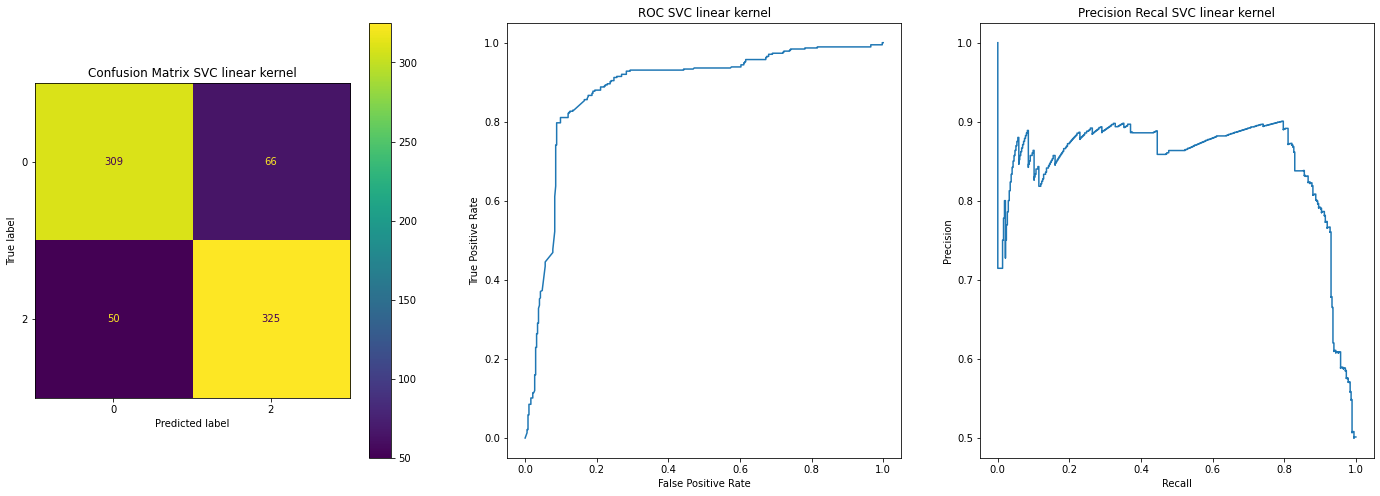

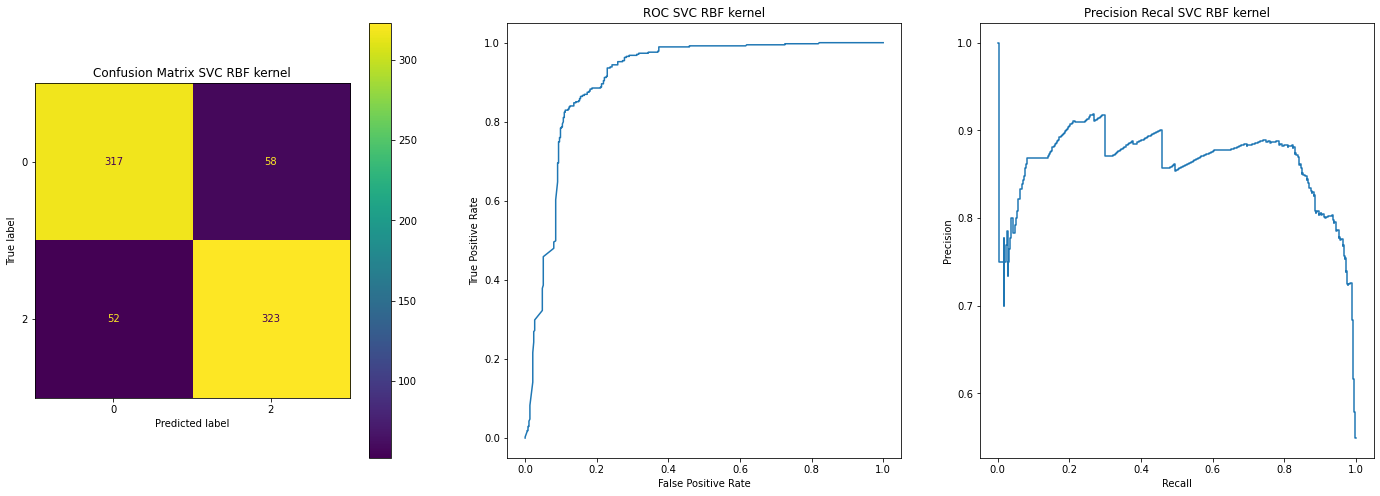

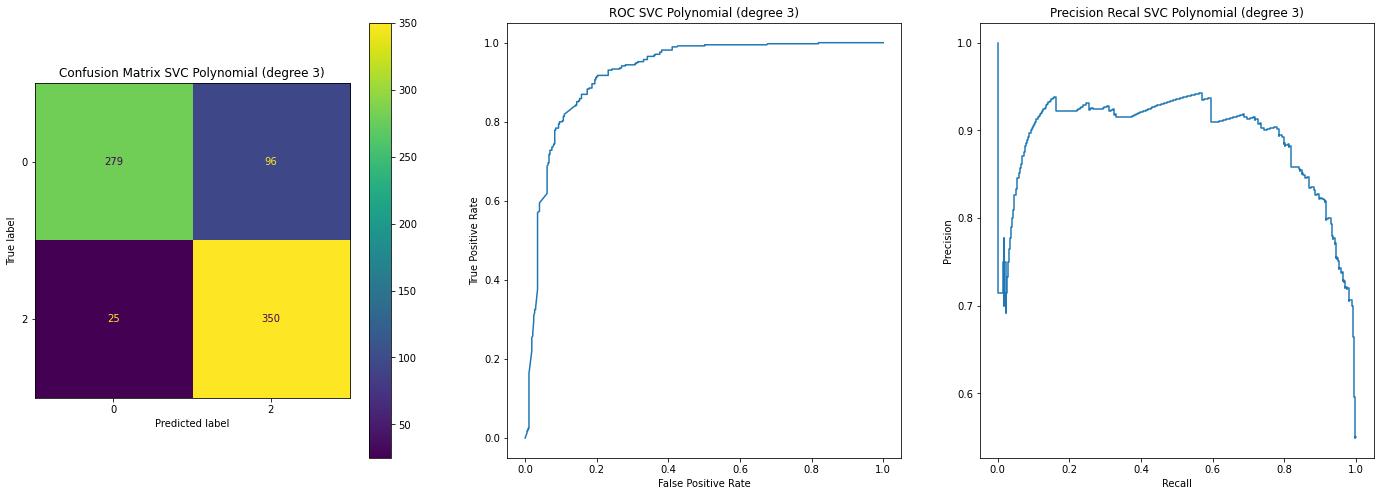

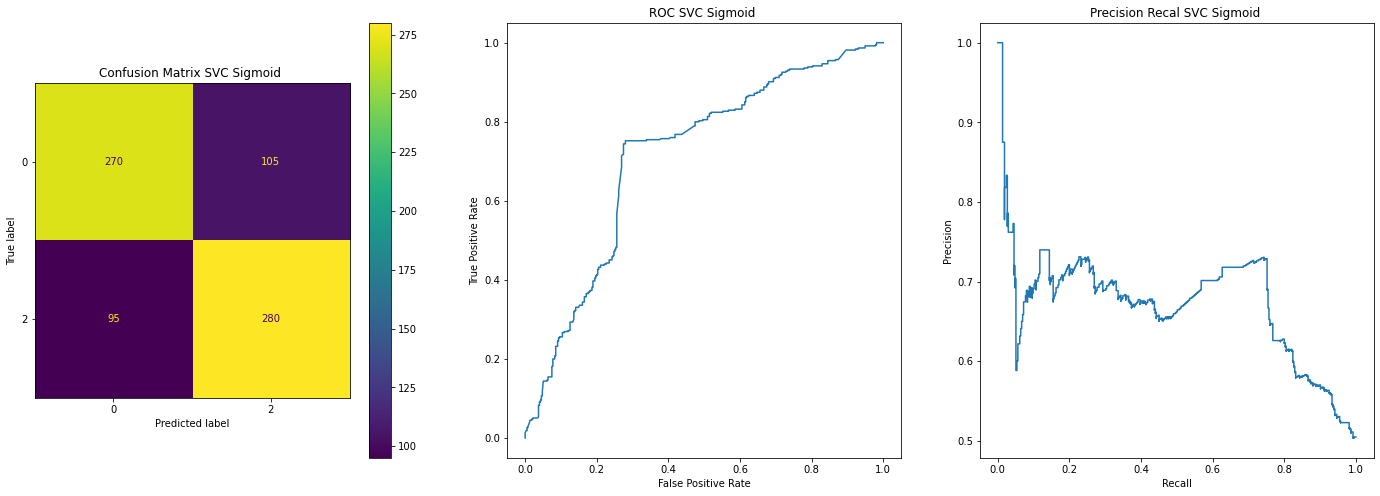

In [128]:

label_names = pd.Series(['negative','positive'])
pengujian=[]

for name, clf in models:
  pred=clf.predict(X_test_to_df)
  test_acc = accuracy_score(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  rmse=mean_squared_error(y_test, pred, squared = False)
  latih=('Dataset {}, data split : {}:{} \n'.format(folder,(1-jmluji)*100,jmluji*100))
  pengujian=pengujian+[{'classifier':name,'akurasi':test_acc,'C':C,'Gamma':gam,'testing':str(dtuji),'mae':mae,'rmse':rmse,'ngram':ngram,'max_feature':featmax}]
  printed_dataset=('Dataset: {} \t'.format(folder))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  print_mae=('MAE {} : {} \n'.format(name,mae))
  print_rmse=('RMSE {} : {} \n'.format(name,rmse))
  with open('hasil/'+folder+'/4_1_testing_svm_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(latih))
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
    f.writelines(''.join(print_mae))
  
  # print(printed)
  # print(print_mae)
  # print(print_rmse)
  # print(classification_report(pred,y_test))
  test_matrix=(confusion_matrix(pred,y_test))
  df_test=pd.DataFrame(test_matrix,  
     columns='Predicted ' + label_names,
     index='Is ' + label_names)
  
  cm = confusion_matrix(y_test, pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)


  y_score = clf.decision_function(X_test_to_df)
  fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr) #.plot()
  # auc = round(roc_auc_score(y_test, y_pred), 4)

  prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall) #.plot()

  # plt.title(name)
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
  roc_display.plot(ax=ax2)
  ax2.set_title('ROC '+name)
  pr_display.plot(ax=ax3)
  ax3.set_title('Precision Recal '+name)
  disp.plot(ax=ax1)
  ax1.set_title('Confusion Matrix '+name)

  plt.savefig("hasil/"+folder+"/4_9_testing_svm_"+name+"_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".png", bbox_inches='tight')

df_pengujian=pd.DataFrame(pengujian)
print(df_pengujian)
df_pengujian.to_csv( "hasil/"+folder+"/4_1_testing_svm_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, header=True, encoding='utf-8-sig')

In [129]:
winsound.Beep(3000,500)
